In [1]:
import numpy as py
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('C:/Users/sidbh/Documents/College/DSE/data_workout.csv')

In [3]:
df.head()

,date,distance_km,duration_min,delta_last_workout,day_category
0,17-10-2017,4.3,21.58,1,0
1,04-11-2017,1.9,9.25,18,1
2,18-11-2017,1.9,9.00,14,1
3,23-11-2017,1.9,8.93,5,0
4,28-11-2017,2.3,11.94,5,0


In [4]:
df.dtypes

date                   object
distance_km           float64
duration_min          float64
delta_last_workout      int64
day_category            int64
dtype: object

In [5]:
df1 = df[['distance_km', 'duration_min', 'delta_last_workout']]

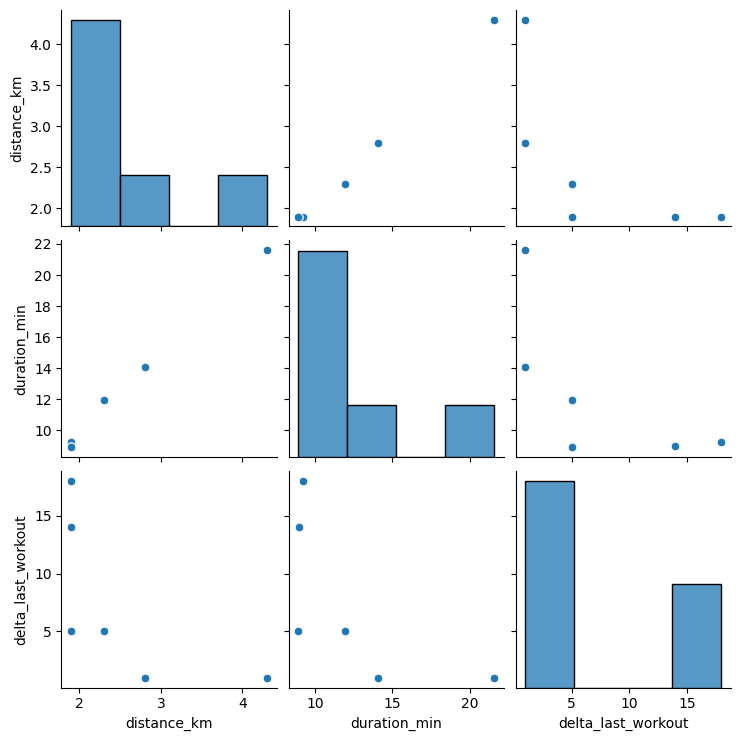

In [6]:
sns.pairplot(df1)

In [7]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df1)
df2 = kmeans.predict(df1)
df2

array([0, 1, 1, 0, 0, 0])

In [8]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.825 14.125  3.   ]
 [ 1.9    9.125 16.   ]]


In [9]:
labels = kmeans.labels_
print(labels)

[0 1 1 0 0 0]


In [10]:
sum_of_squared_distances = []
K=range(1,4)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df1)
    sum_of_squared_distances.append(km.inertia_)


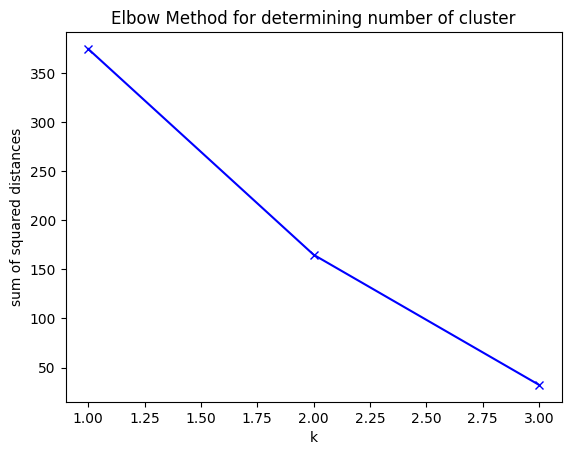

In [11]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum of squared distances')
plt.title('Elbow Method for determining number of cluster')
plt.show()

In [12]:
df3 = df[['day_category']]

score = accuracy_score(df3, df2)
print('Accuracy:{0:f}'.format(score))

Accuracy:1.000000
